# Physics 5300 Final SP22
# Gravitational Orbits in Cartesian Coordinates.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [43]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [44]:
class GravOrbits():
    """
    This class implements the parameters and Lagrange's equations for two particles orbiting under gravity.
    
    Parameters
    ---------- 
    m_1 : float
    m_2 : float
    G : float

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    
    def __init__(self, m_1=1., m_2=1., G=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G

        
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            An 8-component vector with 
                    z[0] = x_1(t) and z[1] = x_dot_1(t)
                    z[2] = y_1(t) and z[3] = y_dot_1(t)
                    z[4] = x_2(t) and z[5] = x_dot_2(t)
                    z[6] = y_2(t) and z[7] = y_dot_2(t)

        Returns
        -------
            
        """

        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2)


        return [ \
                z[1], self.G * self.m_2 * (z[4] - z[0]) / r_12**3, \
                z[3], self.G * self.m_2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G * self.m_1 * (z[4] - z[0]) / r_12**3, \
                z[7], -self.G * self.m_1 * (z[6] - z[2]) / r_12**3, \
                ]    
    
    def solve_ode(self, t_pts, z_0, 
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2      

In [45]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [46]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Simple Orbit Plot

In [47]:
# Labels for plot axes
orbit_labels = (r'$x$', r'$y$')

# Plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

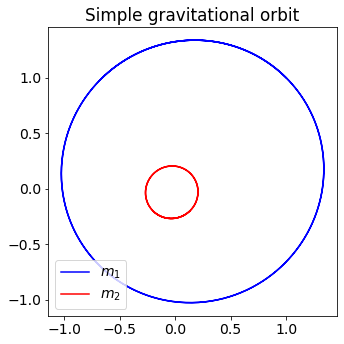

In [48]:
# Common plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

G = 1.
m_1 = 1.
m_2 = 5.

# Instantiate a set of orbits
o1 = GravOrbits(m_1, m_2, G)

# Initial conditions 
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
            o1.solve_ode(t_pts, z_0)

# Start Plot
fig = plt.figure(figsize=(5,5))

# First plot
ax = fig.add_subplot(1,1,1)

start, stp = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Simple_orbit_final.png', bbox_inches='tight')

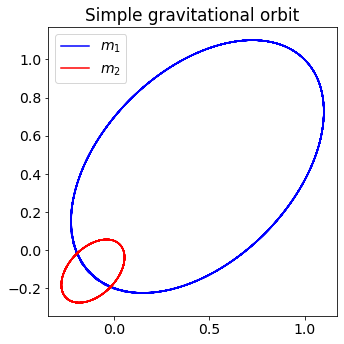

In [49]:
# Different initial conditions
# Common plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

G = 1.
m_1 = 5.
m_2 = 20.

# Instantiate a set of orbits
o1 = GravOrbits(m_1, m_2, G)

# Initial conditions 
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
            o1.solve_ode(t_pts, z_0)

# Start Plot
fig = plt.figure(figsize=(5,5))

# First plot
ax = fig.add_subplot(1,1,1)

start, stp = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Simple_orbit_final_2.png', bbox_inches='tight')

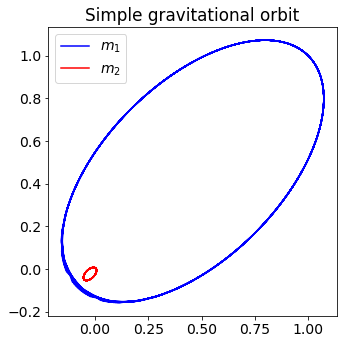

In [50]:
# Different initial conditions, one mass very heavy
# Common plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

G = 1.
m_1 = 1.
m_2 = 20.

# Instantiate a set of orbits
o1 = GravOrbits(m_1, m_2, G)

# Initial conditions 
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
            o1.solve_ode(t_pts, z_0)

# Start Plot
fig = plt.figure(figsize=(5,5))

# First plot
ax = fig.add_subplot(1,1,1)

start, stp = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Simple_orbit_final_3.png', bbox_inches='tight')